# Practice: segmenting supermarket consumers (two variables)

Suppose you are the CMO of a supermarket in the downtown area of a large city in Midwest. Your sales team has collected information of some 1,000 customers who have registered for the supermarket’s online account.
Consumers' data ("SupermarketCustomerTwoVariables.csv") can be found at:
https://raw.githubusercontent.com/zoutianxin1992/MarketingAnalyticsPython/main/Marketing%20Analytics%20in%20Python/Segmentation/Datasets/SupermarketCustomerTwoVariables.csv

Variables: Salary, AmountSpent

Your task is to find how many consumer segments to create, and summarize the consumer characteristics for each segment.

## Load and normalize data

In [ ]:
# Your code here

In [1]:
# importing packages
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans    # Use "sklearn/cluster/KMeans" for clustering analysis 

# importing data and renaming variables
url = "https://raw.githubusercontent.com/zoutianxin1992/MarketingAnalyticsPython/main/Marketing%20Analytics%20in%20Python/Segmentation/Datasets/SupermarketCustomerTwoVariables.csv"
df = pd.read_csv(url) 
df.head()

,Salary,AmountSpent
0,47500,755
1,63600,1318
2,13500,296
3,85600,2436
4,68400,1304


In [2]:
# normalizing the data for k-mean algorithm
df_normalized = (df-df.min())/(df.max()-df.min())  # By default, pandas calculate maximums and minimums by columns, which serves our purpose.

## Calculate $SSE$ for each $k$

Calculate SSE for different number of segments ($k$). $k=1,2,...,K=10$

In [ ]:
# your code here

In [3]:
K = 10  # K is the maximum number of clusters we will check
store_SSE = np.zeros(K)    # create a vector to store SSE's. The k-th entry will be the SSE with k clusters.

for k in range(1, K+1):                                   # try k from 1 to K  
    kmeanSpec = KMeans(n_clusters = k, n_init = 100)                        # set up k-mean model with k clusters
    kmean_result = kmeanSpec.fit(df_normalized)               # run k-mean on normalized data
    store_SSE[k-1] = kmeanSpec.inertia_                       # store the SSE (.inertia_) in the k-th entry of store_SSE

C:\Users\zoutianxin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  f"KMeans is known to have a memory leak on Windows "


## Generate elbow chart

In [ ]:
# your code here

Text(0.5, 0, 'number of clusters')

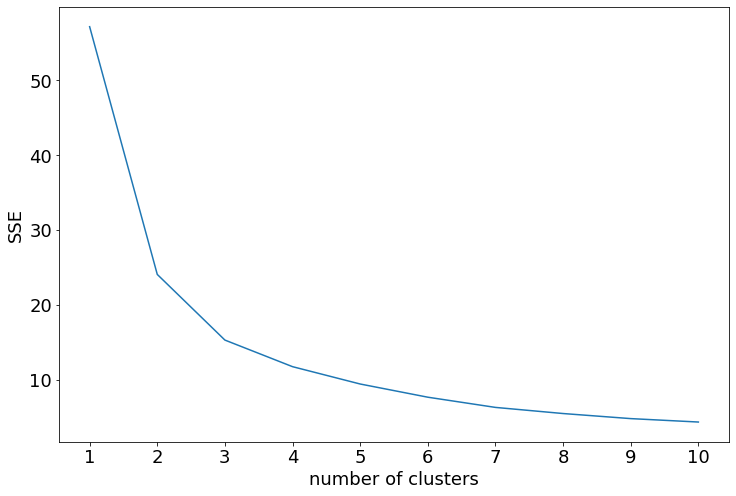

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,8]  # set figure size to be 12*8 inch
plt.plot(range(1, K+1), store_SSE)        
plt.xticks(range(1, K+1), fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel("SSE",fontsize = 18)
plt.xlabel("number of clusters", fontsize = 18)

## Segment consumers into the optimal number of segments

In [ ]:
# your code here

In [5]:
kmeanSpec = KMeans(n_clusters = 3, n_init = 100)  # setup the k-mean model specs
kmean_result = kmeanSpec.fit(df_normalized)    # apply the above model to the normalized data and store the result

In [6]:
df["segment"] = kmean_result.labels_  # add a new column "segment" indicating a consumer's segment
# Note that after applying k-mean, we want to shift our attention back to the original, in-normalized dataset, because the units have real meanings 
# For example, the annual income will be in thousand dollars
df.head()

,Salary,AmountSpent,segment
0,47500,755,0
1,63600,1318,2
2,13500,296,0
3,85600,2436,1
4,68400,1304,2


## Post-segmentation analysis

By each segment, calculate mean/min/max/std for each variable. Also calculate the number of consumers in each segment.

In [ ]:
# your code here

In [11]:
# We want to summarize, by each segment, the descriptive stats 
summary_table = df.groupby("segment").aggregate({                           # groupby("X") enables the calculation is separately done for each value of X 
    "Salary": ["mean"],             # calculate the mean/min/max/std of salary for each segment
    "AmountSpent": ["mean"],            # calculate the mean/min/max/std of AmountSpent for each segment
    "segment": "count"                                       # count how many consumers are there in each segment
}
)
summary_table

,Salary,AmountSpent,segment
,mean,mean,count
segment,,,
0,27141.943128,512.059242,422
1,98501.734104,2792.040462,173
2,67708.395062,1263.622222,405


## Optional: Visualize segmentation result

In [ ]:
# your code here

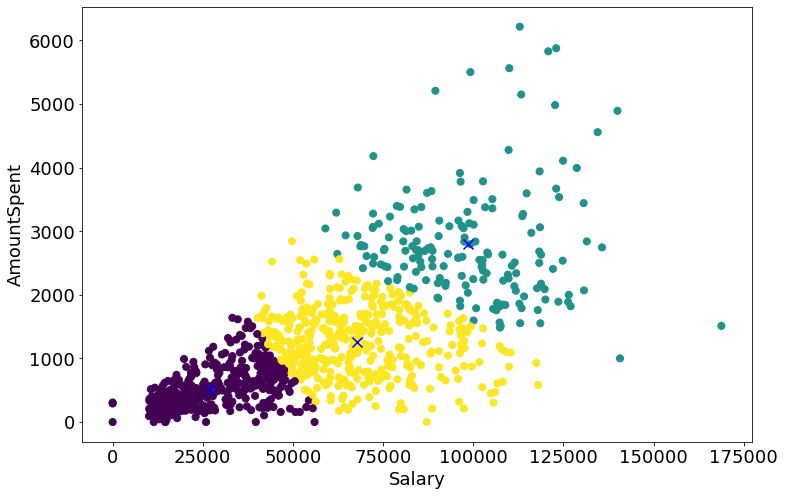

In [12]:
# Extract centroid positions
centroids = summary_table.iloc[:,[0,1]]
b
# Generate segmentation results
plt.rcParams['figure.figsize'] = [12,8] 
plt.scatter(df["Salary"], df["AmountSpent"], c = df["segment"],s = 50) # "c" is color parameter, so we assign different segments with different parameters
plt.xlabel("Salary", fontsize = 18)
plt.ylabel("AmountSpent", fontsize = 18)
plt.tick_params(axis='both', labelsize = 18)

# mark the centroids on the plot
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c = "blue", marker = "x", s = 100);

In [13]:
centroids

,Salary,AmountSpent
,mean,mean
segment,,
0,27141.943128,512.059242
1,98501.734104,2792.040462
2,67708.395062,1263.622222
